In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

------------------------
## Question 1
------------------------

In [2]:
df = pd.read_csv('heights.csv')
df.head(3)

,mother_height,daughter_height
0,58,60
1,62,60
2,60,58


In [8]:
x, y = df.mother_height.values, df.daughter_height.values

In [183]:
def eval(x, y, b):
    y_pred = x.dot(b)
    mse = ((y - y_pred) ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

def regress(x, y, b=None, epochs=5, learning_rate=0.001, error_log=None):
    n = x.shape[0]
    x = x.reshape(n,-1)
    y = y.reshape(n,-1)
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    
    if b is None:
        b = np.zeros(x.shape[-1])
    
    for epoch in range(1, epochs+1):
        for i in range(n):
            x_data, y_data = x[i], y[i]
            y_pred = x_data.dot(b)
            # print(x_data, y_data, b, y_pred, (y_data-y_pred) * x_data[1])

            b += learning_rate * (y_data - y_pred) * x_data
            
            if error_log is not None:
                error_log.append(eval(x, y, b))
        
        print(learning_rate * (y_data - y_pred) * x_data[0])
        print(f"Epoch: {epoch} ---> RMSE: {eval(x, y, b)}")
    
    return b

def predict(x, b):
    n = x.shape[0]
    x = x.reshape(n,-1)  
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    return x.dot(b)

In [184]:
b = regress(x, y, epochs=10, learning_rate=0.00005)

[4.96332523e-05]
Epoch: 1 ---> RMSE: 0.7028636391993982
[4.91090182e-05]
Epoch: 2 ---> RMSE: 0.6987032285036477
[4.85902696e-05]
Epoch: 3 ---> RMSE: 0.6946245590010605
[4.80769489e-05]
Epoch: 4 ---> RMSE: 0.6906266419923784
[4.75689993e-05]
Epoch: 5 ---> RMSE: 0.6867084902332641
[4.70663645e-05]
Epoch: 6 ---> RMSE: 0.6828691179998049
[4.65689889e-05]
Epoch: 7 ---> RMSE: 0.6791075411633777
[4.60768173e-05]
Epoch: 8 ---> RMSE: 0.6754227772746346
[4.55897952e-05]
Epoch: 9 ---> RMSE: 0.6718138456563606
[4.51078687e-05]
Epoch: 10 ---> RMSE: 0.6682797675049208


In [77]:
from sklearn.linear_model import LinearRegression, LogisticRegression

model = LogisticRegression().fit(x.reshape(x.shape[0], -1), y.reshape(y.shape[0], -1))

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
print("Accuracy of linear regression model:", model.score(x.reshape(x.shape[0], -1), y.reshape(y.shape[0], -1)))

Accuracy of linear regression model: 0.8333333333333334


In [86]:
model.coef_

array([[-0.59358494],
       [-0.45895229],
       [ 0.22207952],
       [ 0.83045518]])

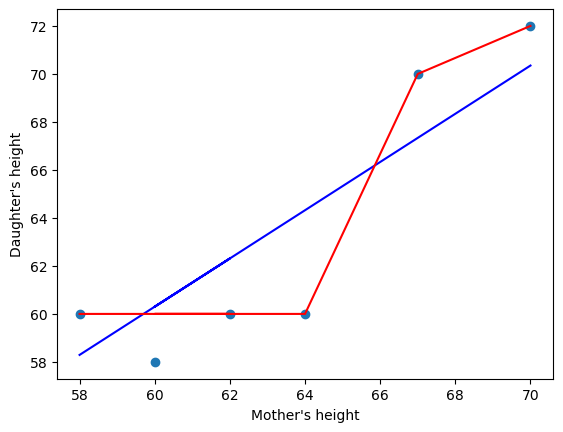

In [94]:
fig = plt.figure()
plt.scatter(x, y)

plt.plot(x, predict(x, b), color='blue')

plt.plot(x, model.predict(x.reshape(x.shape[0], -1)), color='red')

plt.xlabel('Mother\'s height')
plt.ylabel('Daughter\'s height')

plt.show()

[4.96332523e-05]
Epoch: 1 ---> RMSE: 0.7028636391993982
[4.91090182e-05]
Epoch: 2 ---> RMSE: 0.6987032285036477
[4.85902696e-05]
Epoch: 3 ---> RMSE: 0.6946245590010605
[4.80769489e-05]
Epoch: 4 ---> RMSE: 0.6906266419923784
[4.75689993e-05]
Epoch: 5 ---> RMSE: 0.6867084902332641
[4.70663645e-05]
Epoch: 6 ---> RMSE: 0.6828691179998049
[4.65689889e-05]
Epoch: 7 ---> RMSE: 0.6791075411633777
[4.60768173e-05]
Epoch: 8 ---> RMSE: 0.6754227772746346
[4.55897952e-05]
Epoch: 9 ---> RMSE: 0.6718138456563606
[4.51078687e-05]
Epoch: 10 ---> RMSE: 0.6682797675049208


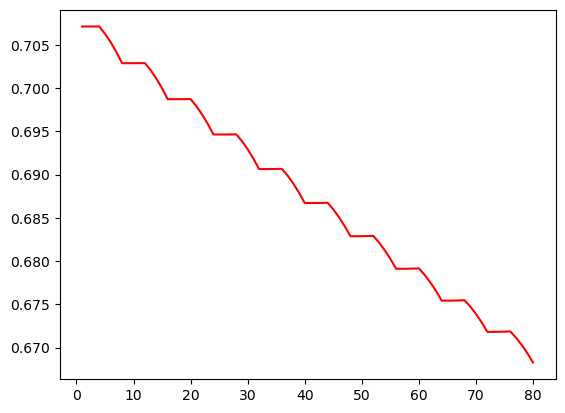

In [187]:
errors = []

b = regress(x, y, epochs=10, learning_rate=0.00005, error_log=errors)

fig = plt.figure()

plt.plot(list(range(1, len(errors)+1)), errors, color='red')

plt.xlabel("Iteration")
plt.ylabel("RMSE Error")

plt.show()

In [101]:
print("Predictions of daughter's height for mother's height = 63 \n")
print(f"Without sklearn: {predict(np.array([63]), b)[0]}, With sklearn: {model.predict(np.array([[63]]))[0]}")

Predictions of daughter's height for mother's height = 63 

Without sklearn: 63.31589043388764, With sklearn: 60


------------------------
## Question 2
------------------------

In [235]:
df = pd.read_csv('study.csv')
df.head(3)

,hours,pass
0,1,0
1,2,0
2,3,0


In [105]:
df.columns

Index(['hours', 'pass'], dtype='object')

In [223]:
x, y = df.hours.values, df['pass'].values

In [236]:
def eval(x, y, b):
    z = x.dot(b)
    y_pred = np.power(1 + np.power(np.exp(1), (-1 * z)), -1)
    y, y_pred = y.flatten(), y_pred.flatten()
    log_loss = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred) 
    log_loss *= -1
    return log_loss.mean()

def eval_accuracy(x, y, b):
    n = x.shape[0]
    z = x.dot(b)
    
    y_pred = np.power(1 + np.power(np.exp(1), (-1 * z)), -1)
    
    y_pred = np.where(y_pred < .5, 0, 1)
    error = np.absolute(y.flatten() - y_pred.flatten())
    incorrect = error.sum()
    correct = n - incorrect
    acc = correct / n * 100
    return acc

def regress(x, y, b=None, epochs=5, learning_rate=0.001, error_log=None):
    n = x.shape[0]
    x = x.reshape(n,-1)
    y = y.reshape(n,-1)
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    
    if b is None:
        b = np.zeros(x.shape[-1])
    
    for epoch in range(1, epochs+1):
        for i in range(n):
            x_data, y_data = x[i], y[i]
            z = x_data.dot(b)
            y_pred = 1 / (1 + np.power(np.exp(1), (-1 * z)))
            # print(x_data, y_data, b, y_pred, (y_data-y_pred) * x_data[1])

            b += learning_rate * (y_data - y_pred) * x_data
            
            if error_log is not None:
                error_log.append(eval(x, y, b))
        
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} ---> Accuracy: {eval_accuracy(x, y, b)}, Log-Loss: {eval(x, y, b)}")
    
    return b

def predict(x, b):
    n = x.shape[0]
    x = x.reshape(n,-1)  
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    z = x.dot(b)
    y_pred = np.power(1 + np.power(np.exp(1), (-1 * z)), -1)
    y_pred = np.where(y_pred < .5, 0, 1)
    return y_pred
    

b = regress(x, y, epochs=500, learning_rate=.01)

Epoch: 10 ---> Accuracy: 50.0, Log-Loss: 0.594391117515416
Epoch: 20 ---> Accuracy: 50.0, Log-Loss: 0.5718276570924665
Epoch: 30 ---> Accuracy: 62.5, Log-Loss: 0.5505169648389092
Epoch: 40 ---> Accuracy: 62.5, Log-Loss: 0.5307146397289615
Epoch: 50 ---> Accuracy: 62.5, Log-Loss: 0.5123104753873668
Epoch: 60 ---> Accuracy: 75.0, Log-Loss: 0.4951937259397532
Epoch: 70 ---> Accuracy: 75.0, Log-Loss: 0.4792602192963798
Epoch: 80 ---> Accuracy: 75.0, Log-Loss: 0.4644128505466212
Epoch: 90 ---> Accuracy: 75.0, Log-Loss: 0.450561691339614
Epoch: 100 ---> Accuracy: 75.0, Log-Loss: 0.43762389353331577
Epoch: 110 ---> Accuracy: 75.0, Log-Loss: 0.4255234471311087
Epoch: 120 ---> Accuracy: 75.0, Log-Loss: 0.4141908402537982
Epoch: 130 ---> Accuracy: 87.5, Log-Loss: 0.40356265897263555
Epoch: 140 ---> Accuracy: 87.5, Log-Loss: 0.3935811559555008
Epoch: 150 ---> Accuracy: 87.5, Log-Loss: 0.384193809328612
Epoch: 160 ---> Accuracy: 87.5, Log-Loss: 0.3753528869897875
Epoch: 170 ---> Accuracy: 87.5, Lo

In [237]:
print(f"Probability of passing after studying 3.5 hours: {predict(np.array([3.5]), b)[0] * 100} %")

print(f"Probability of passing after studying 7.0 hours: {predict(np.array([7.0]), b)[0] * 100} %")

Probability of passing after studying 3.5 hours: 0 %
Probability of passing after studying 7.0 hours: 100 %


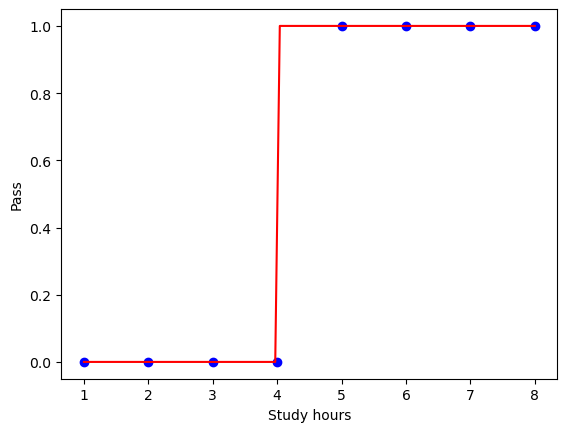

In [238]:
fig = plt.figure()

plt.scatter(x, y, color='blue')

plot_x = np.linspace(1, 8, 100)
plt.plot(plot_x, predict(plot_x, b), color='red')

plt.xlabel("Study hours")
plt.ylabel("Pass")

plt.show()

Epoch: 10 ---> Accuracy: 62.5, Log-Loss: 0.5315518568542728
Epoch: 20 ---> Accuracy: 75.0, Log-Loss: 0.4109200152963797
Epoch: 30 ---> Accuracy: 75.0, Log-Loss: 0.33989542741756607
Epoch: 40 ---> Accuracy: 87.5, Log-Loss: 0.2938184271260873
Epoch: 50 ---> Accuracy: 87.5, Log-Loss: 0.2615230659740603
Epoch: 60 ---> Accuracy: 87.5, Log-Loss: 0.23753801981332734
Epoch: 70 ---> Accuracy: 87.5, Log-Loss: 0.21893163920821526
Epoch: 80 ---> Accuracy: 87.5, Log-Loss: 0.2040066108125214
Epoch: 90 ---> Accuracy: 87.5, Log-Loss: 0.19171573030202912
Epoch: 100 ---> Accuracy: 87.5, Log-Loss: 0.1813784666315095


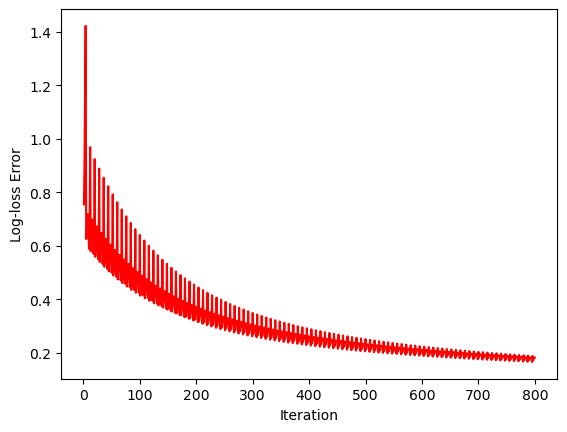

In [248]:
errors = []

b = regress(x, y, epochs=100, learning_rate=0.1, error_log=errors)

fig = plt.figure()

plt.plot(list(range(1, len(errors)+1)), errors, color='red')

plt.xlabel("Iteration")
plt.ylabel("Log-loss Error")

plt.show()

---------------------------
## Question 3
---------------------------

In [250]:
df = pd.read_csv('data.csv')
df.head(6)

,x1,x2,y
0,4,1,1
1,2,8,0
2,1,0,1
3,3,2,0
4,1,4,0
5,6,7,0


In [251]:
x, y = df[['x1', 'x2']].values, df['y'].values
x.shape, y.shape

((6, 2), (6,))

Epoch: 10 ---> Accuracy: 83.33333333333334, Log-Loss: 0.37881728904364453
Epoch: 20 ---> Accuracy: 83.33333333333334, Log-Loss: 0.3231477142157866
Epoch: 30 ---> Accuracy: 100.0, Log-Loss: 0.2878723433263342
Epoch: 40 ---> Accuracy: 100.0, Log-Loss: 0.26323869671849354
Epoch: 50 ---> Accuracy: 100.0, Log-Loss: 0.24483737957455565


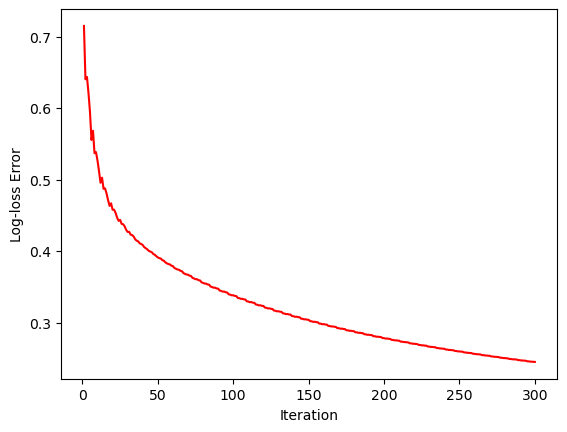

In [260]:
errors = []

b = regress(x, y, epochs=50, learning_rate=0.01, error_log=errors)

fig = plt.figure()

plt.plot(list(range(1, len(errors)+1)), errors, color='red')

plt.xlabel("Iteration")
plt.ylabel("Log-loss Error")

plt.show()

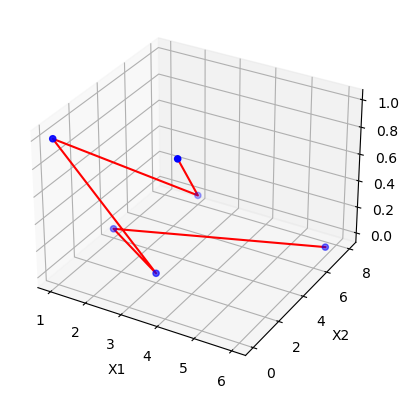

In [265]:
# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x[:, 0], x[:, 1], y, c='b', marker='o')

ax.plot(x[:, 0], x[:, 1], predict(x, b), color='red')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()